In [7]:
import matplotlib.pyplot as plt
import allesfitter

#::: your settings
datadir = 'allesfit' #change this to what you need
inst = 'TIC_1403938' #change this to what you need
key = 'flux' #change this to what you need

In [2]:
#::: initialize the allesclass
alles = allesfitter.allesclass(datadir);

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N_flares', '2'),
             ('automatically set:', ''),
             ('time_format', 'BJD_TDB'),
             ('inst_rv2', []


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /Users/mx/Dropbox/Science/Code/allesfitter/allesfitter/basement.py, line: 632

! WARNING:
 No NS nor MCMC derived file detected.
type: <class 'UserWarning'>, file: /Users/mx/Dropbox/Science/Code/allesfitter/allesfitter/__init__.py, line: 140


In [4]:
#::: load the data (and the correct error bars)
time = alles.data[inst]['time']
flux = alles.data[inst][key]
flux_err = alles.data[inst]['err_scales_'+key] * alles.posterior_params_median['err_'+key+'_'+inst]

In [5]:
#::: load the median baseline, median lightcurve model, and median residuals
baseline = alles.get_posterior_median_baseline(inst, key)
model = alles.get_posterior_median_model(inst, key)
residuals = alles.get_posterior_median_residuals(inst, key)

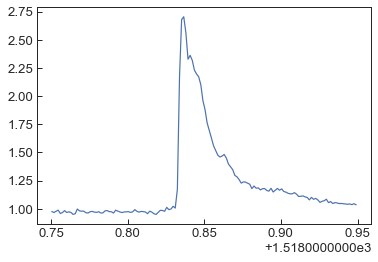

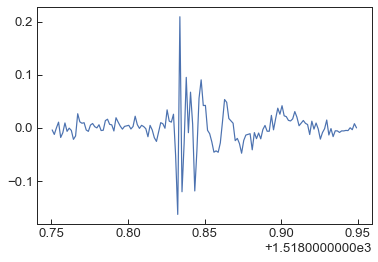

In [11]:
#::: make a nice plot, just to see it
plt.figure()
plt.plot(time, flux, 'b-')

plt.figure()
plt.plot(time, residuals, 'b-')

In [ ]:
#::: save everything to a file for your collaborators
X = np.column_stack((time, flux, flux_err, detrended_flux, model, residuals))
np.savetxt('residual_TIC_1403938.csv', X, delimiter=',')